In [3]:
!pip install -q kaggle

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download tusharpadhy/deepfake-dataset

Dataset URL: https://www.kaggle.com/datasets/tusharpadhy/deepfake-dataset
License(s): CC0-1.0
100% 5.42G/5.42G [04:04<00:00, 24.0MB/s]
100% 5.42G/5.42G [04:04<00:00, 23.8MB/s]


In [5]:
!unzip /content/deepfake-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: valid/Real/real_5499.jpg  
  inflating: valid/Real/real_55.jpg  
  inflating: valid/Real/real_550.jpg  
  inflating: valid/Real/real_5500.jpg  
  inflating: valid/Real/real_5501.jpg  
  inflating: valid/Real/real_5502.jpg  
  inflating: valid/Real/real_5503.jpg  
  inflating: valid/Real/real_5504.jpg  
  inflating: valid/Real/real_5505.jpg  
  inflating: valid/Real/real_5506.jpg  
  inflating: valid/Real/real_5507.jpg  
  inflating: valid/Real/real_5508.jpg  
  inflating: valid/Real/real_5509.jpg  
  inflating: valid/Real/real_551.jpg  
  inflating: valid/Real/real_5510.jpg  
  inflating: valid/Real/real_5511.jpg  
  inflating: valid/Real/real_5512.jpg  
  inflating: valid/Real/real_5513.jpg  
  inflating: valid/Real/real_5514.jpg  
  inflating: valid/Real/real_5515.jpg  
  inflating: valid/Real/real_5516.jpg  
  inflating: valid/Real/real_5517.jpg  
  inflating: valid/Real/real_5518.jpg  
  inflating: valid/Real/real_5519

In [6]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [7]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image_dataset = datasets.ImageFolder(root='/content/train', transform=transform)

batch_size = 256
data_loader = DataLoader(image_dataset, batch_size=batch_size, shuffle=True)


image, label = image_dataset[0]
print("Example Image Shape:", image.shape)
print("Example Label:", label)

Example Image Shape: torch.Size([3, 224, 224])
Example Label: 0


In [8]:
from torchvision import datasets, transforms

# Define transforms for training and validation.
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Adjust these paths to match your loaded dataset
train_dir = '/content/train'  # update with your training folder path
val_dir   = '/content/valid'  # update with your validation folder path

# Create the datasets using ImageFolder
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(root=val_dir, transform=val_transforms)

# Print the classes to verify correct loading
print("Classes found:", train_dataset.classes)


Classes found: ['Fake', 'Real']


In [9]:
from torch.utils.data import DataLoader

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")


Number of training samples: 240002
Number of validation samples: 59428


In [10]:
import torch
import torch.nn as nn
from torchvision import models

# Load pretrained ResNet50
model = models.resnet50(pretrained=True)

# Freeze all layers so that we only train the final layer initially
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer to output a single value (for binary classification)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 1)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(model)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 203MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
import torch.optim as optim

# BCEWithLogitsLoss combines a sigmoid layer with binary cross entropy loss.
criterion = nn.BCEWithLogitsLoss()

# Only the final layer's parameters are being optimized initially.
optimizer = optim.Adam(model.fc.parameters(), lr=1e-4)


In [12]:
import time, copy

def train_model(model, criterion, optimizer, dataloaders, num_epochs=10, device='cuda'):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float('inf')

    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-'*10)

        # Each epoch has a training and a validation phase.
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                loader = dataloaders['train']
            else:
                model.eval()
                loader = dataloaders['val']

            running_loss = 0.0
            running_corrects = 0
            total = 0

            # Iterate over the data.
            for inputs, labels in loader:
                inputs = inputs.to(device)
                labels = labels.to(device).float().unsqueeze(1)  # shape: (batch_size, 1)

                optimizer.zero_grad()

                # forward pass
                with torch.set_grad_enabled(phase=='train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    preds = (torch.sigmoid(outputs) > 0.5).float()

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                total += inputs.size(0)

            epoch_loss = running_loss / total
            epoch_acc = running_corrects.double() / total

            if phase=='train':
                train_losses.append(epoch_loss)
                train_accs.append(epoch_acc.item())
            else:
                val_losses.append(epoch_loss)
                val_accs.append(epoch_acc.item())

            print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Save best model weights based on validation loss.
            if phase=='val' and epoch_loss < best_loss:
                best_loss = epoch_loss
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed//60:.0f}m {time_elapsed%60:.0f}s')
    print(f'Best val loss: {best_loss:.4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)

    history = {'train_loss': train_losses, 'val_loss': val_losses,
               'train_acc': train_accs, 'val_acc': val_accs}
    return model, history

# Combine dataloaders into a dictionary.
dataloaders = {'train': train_loader, 'val': val_loader}


In [13]:
num_epochs = 5  # You can adjust this number as needed.
model, history = train_model(model, criterion, optimizer, dataloaders,
                             num_epochs=num_epochs, device=device)


Epoch 1/5
----------
Train Loss: 0.6148 Acc: 0.6609
Val Loss: 0.6230 Acc: 0.6632

Epoch 2/5
----------
Train Loss: 0.5886 Acc: 0.6854
Val Loss: 0.6351 Acc: 0.6609

Epoch 3/5
----------
Train Loss: 0.5789 Acc: 0.6942
Val Loss: 0.6210 Acc: 0.6717

Epoch 4/5
----------
Train Loss: 0.5742 Acc: 0.6977
Val Loss: 0.6187 Acc: 0.6754

Epoch 5/5
----------
Train Loss: 0.5686 Acc: 0.7021
Val Loss: 0.6146 Acc: 0.6822

Training complete in 20m 27s
Best val loss: 0.6146


In [14]:
# Uncomment below to fine-tune the last block of ResNet50.

for name, param in model.named_parameters():
    if "layer4" in name or "fc" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

# Use a lower learning rate for fine-tuning.
optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-5)
num_epochs_ft = 5
model, history_ft = train_model(model, criterion, optimizer_ft, dataloaders,
                                num_epochs=num_epochs_ft, device=device)

# (Optional) Merge the fine-tuning history with the initial training history.
history['train_loss'].extend(history_ft['train_loss'])
history['val_loss'].extend(history_ft['val_loss'])
history['train_acc'].extend(history_ft['train_acc'])
history['val_acc'].extend(history_ft['val_acc'])


Epoch 1/5
----------
Train Loss: 0.3140 Acc: 0.8581
Val Loss: 0.2477 Acc: 0.8986

Epoch 2/5
----------
Train Loss: 0.2183 Acc: 0.9072
Val Loss: 0.1791 Acc: 0.9311

Epoch 3/5
----------
Train Loss: 0.1868 Acc: 0.9220
Val Loss: 0.1664 Acc: 0.9367

Epoch 4/5
----------
Train Loss: 0.1659 Acc: 0.9313
Val Loss: 0.1364 Acc: 0.9495

Epoch 5/5
----------
Train Loss: 0.1503 Acc: 0.9381
Val Loss: 0.1377 Acc: 0.9482

Training complete in 21m 18s
Best val loss: 0.1364


In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).float().unsqueeze(1)
        outputs = model(inputs)
        preds = (torch.sigmoid(outputs) > 0.5).int()
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds).flatten()
all_labels = np.array(all_labels).flatten()

cm = confusion_matrix(all_labels, all_preds)
report = classification_report(all_labels, all_preds, target_names=train_dataset.classes)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[27590  2051]
 [  951 28836]]

Classification Report:
              precision    recall  f1-score   support

        Fake       0.97      0.93      0.95     29641
        Real       0.93      0.97      0.95     29787

    accuracy                           0.95     59428
   macro avg       0.95      0.95      0.95     59428
weighted avg       0.95      0.95      0.95     59428



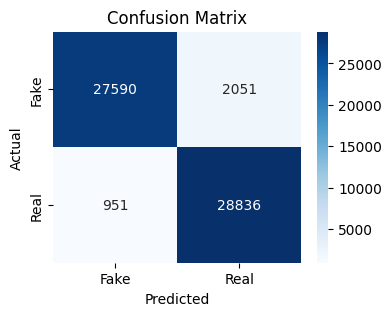

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=train_dataset.classes,
            yticklabels=train_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


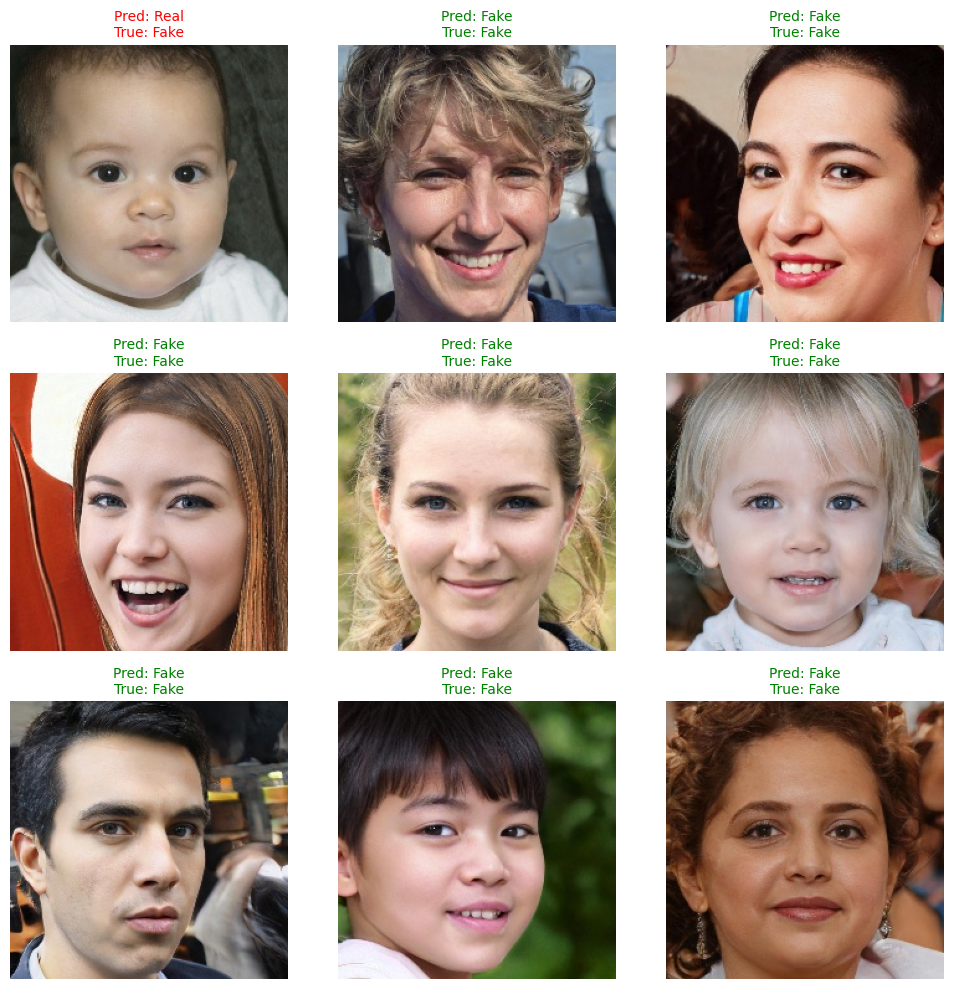

In [17]:
def imshow(inp, title=None):
    """Display image for a Tensor."""
    inp = inp.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.axis('off')

# Get one batch from the validation loader
inputs, labels = next(iter(val_loader))
inputs = inputs.to(device)
outputs = model(inputs)
preds = (torch.sigmoid(outputs) > 0.5).int().cpu().numpy().flatten()
labels = labels.numpy()

plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    pred_label = train_dataset.classes[preds[i]]
    true_label = train_dataset.classes[labels[i]]
    color = "green" if pred_label == true_label else "red"
    imshow(inputs[i], title=f"Pred: {pred_label}\nTrue: {true_label}")
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color, fontsize=10)
plt.tight_layout()
plt.show()


In [18]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

accuracy = accuracy_score(all_labels, all_preds)
sensitivity = recall_score(all_labels, all_preds)  # Sensitivity is same as recall
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
auc = roc_auc_score(all_labels, all_preds)

print(f"Accuracy: {accuracy*100:.1f}%")
print(f"Sensitivity (Recall): {recall*100:.1f}%")
print(f"Recall: {recall*100:.1f}%")
print(f"F1 Score: {f1*100:.1f}%")
print(f"AUC: {auc*100:.1f}%")

Accuracy: 94.9%
Sensitivity (Recall): 96.8%
Recall: 96.8%
F1 Score: 95.1%
AUC: 94.9%


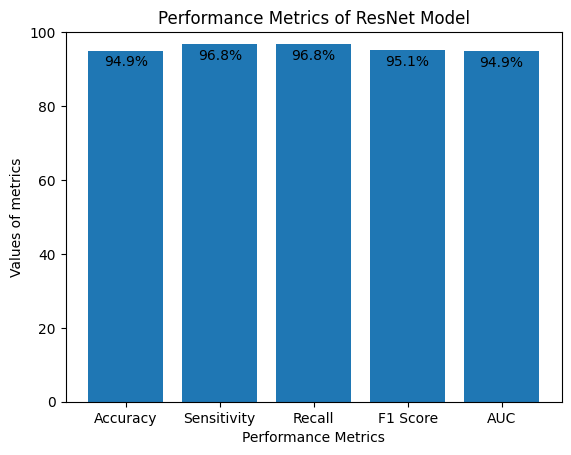

In [19]:
metrics_names = ['Accuracy', 'Sensitivity', 'Recall', 'F1 Score', 'AUC']
metrics_values = [accuracy*100, recall*100, recall*100, f1*100, auc*100]

fig, ax = plt.subplots()
bars = ax.bar(metrics_names, metrics_values)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval - 5, f'{yval:.1f}%', ha='center', va='bottom', color='black', fontsize=10)

# Plot formatting
plt.ylim(0, 100)
plt.ylabel('Values of metrics')
plt.xlabel('Performance Metrics')
plt.title('Performance Metrics of ResNet Model')
plt.show()